In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('dark_background')

In [2]:
df = pd.read_csv('netflix1.csv')

### Seeing the overview of the data

In [3]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.duplicated())

(8790, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
87

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

### Making the column more understandable

In [7]:
df.rename(columns= (lambda x : x.replace('listed_in','genre').replace('date_added','date').replace('show_id','Seasons')),inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.reset_index(drop=True)

### Seeing the anomalies in unique

In [15]:
for column in df.columns[1:8]:
    print(f'{column} = {df[column].unique()}')
    print('-'*50)

type = ['Movie' 'TV Show']
--------------------------------------------------
title = ['Dick Johnson Is Dead' 'Ganglands' 'Midnight Mass' ...
 'Zindagi Gulzar Hai' 'Yoko' 'YOM']
--------------------------------------------------
director = ['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
--------------------------------------------------
country = ['United States' 'France' 'Brazil' 'United Kingdom' 'India' 'Germany'
 'Pakistan' 'Not Given' 'China' 'South Africa' 'Japan' 'Nigeria' 'Spain'
 'Philippines' 'Australia' 'Argentina' 'Canada' 'Hong Kong' 'Italy'
 'New Zealand' 'Egypt' 'Colombia' 'Mexico' 'Belgium' 'Switzerland'
 'Taiwan' 'Bulgaria' 'Poland' 'South Korea' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Kuwait' 'Malaysia' 'Vietnam' 'Lebanon' 'Romania' 'Syria'
 'United Arab Emirates' 'Sweden' 'Mauritius' 'Austria' 'Turkey'
 'Czech Republic' 'Cameroon' 'Netherlands' 'Ireland' 'Russia' 'Kenya'
 'Chile' 'Uruguay' 'Bangladesh' 'Portuga

# director and country has not given data

In [18]:
print(df['director'].value_counts())
print('-'*20)
print(df['country'].value_counts())

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64
--------------------
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64


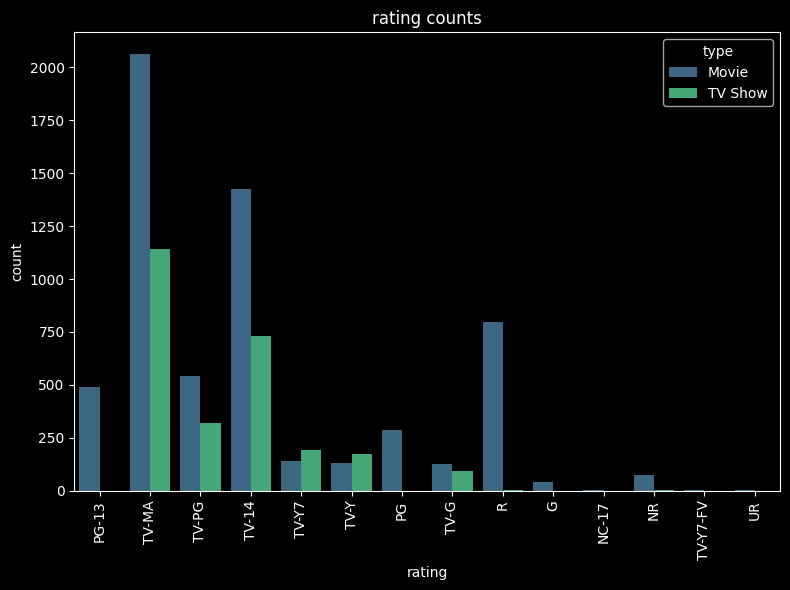

In [26]:
plt.figure(figsize=(8,6))
sns.countplot( x= df['rating'],  hue = df['type'], palette='viridis')
plt.title('rating counts')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()